# Dynamic Uncertainty & Chance-Constrained Decisions

---

## What is this?

This notebook shows how to connect  
the **geometric view** (shape) with the **probabilistic view** (uncertainty)  
and turn that into real-world **decision constraints**.

---

## Core idea

- Real data is never static: the mean and covariance can change over time.
- The **Kalman Filter** is a classic example:  
  it updates the estimate of the state and its uncertainty dynamically.
- When making resource plans, you often add explicit chance constraints:  
  e.g., "We want at least 95% probability that supply ≥ demand."

---

## What we’ll do

1. Simulate a simple 1D or 2D process with measurement noise.
2. Apply a Kalman Filter to update mean and covariance.
3. Visualize how the uncertainty ellipse evolves over time.
4. Build a chance-constrained toy:  
   - Model random demand  
   - Find supply level that meets `P(Supply ≥ Demand) ≥ 95%`.

---

## Goal

> Understand how covariance is not just static shape,  
> but a living measure of uncertainty,  
> and how probability constraints make decisions robust.


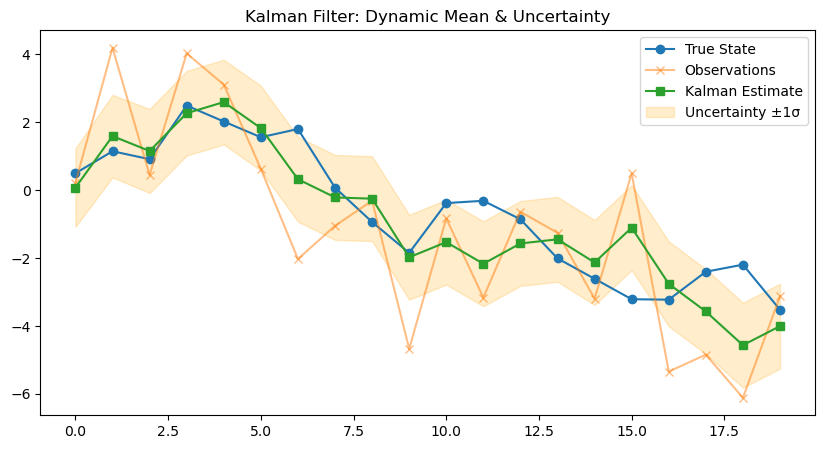

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# True state process: x_t = x_{t-1} + w_t
# Observations: z_t = x_t + v_t

n_steps = 20
true_state = [0]
observations = []

for t in range(1, n_steps + 1):
    new_state = true_state[-1] + np.random.normal(0, 1)
    true_state.append(new_state)
    obs = new_state + np.random.normal(0, 2)
    observations.append(obs)

# Kalman Filter setup
x_hat = 0
P = 1

Q = 1  # Process noise covariance
R = 4  # Measurement noise covariance

x_hats = []
P_s = []

for z in observations:
    # Prediction
    x_hat_prior = x_hat
    P_prior = P + Q

    # Update
    K = P_prior / (P_prior + R)
    x_hat = x_hat_prior + K * (z - x_hat_prior)
    P = (1 - K) * P_prior

    x_hats.append(x_hat)
    P_s.append(P)

plt.figure(figsize=(10, 5))
plt.plot(true_state[1:], label='True State', marker='o')
plt.plot(observations, label='Observations', marker='x', alpha=0.5)
plt.plot(x_hats, label='Kalman Estimate', marker='s')
plt.fill_between(range(len(x_hats)), 
                 np.array(x_hats) - np.sqrt(P_s),
                 np.array(x_hats) + np.sqrt(P_s),
                 color='orange', alpha=0.2, label='Uncertainty ±1σ')
plt.legend()
plt.title("Kalman Filter: Dynamic Mean & Uncertainty")
plt.show()


To meet demand with ≥95% probability, supply should be at least: 66.45


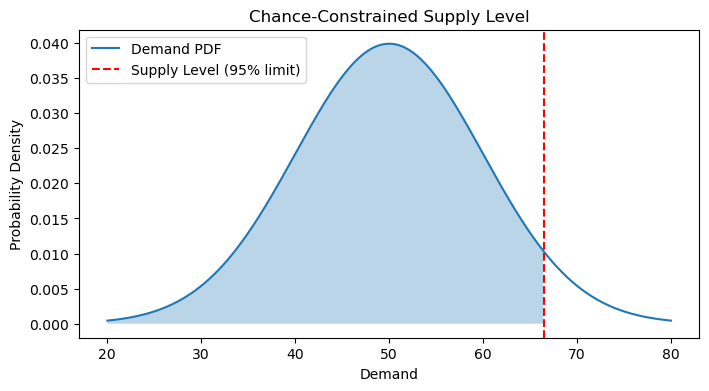

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Assume future demand is normal(50, 10)
mu_demand = 50
sigma_demand = 10

# Probability we want: P(Supply >= Demand) >= 95%

# Since Demand ~ N(mu, sigma^2)
# P(Supply >= Demand) = P(Z <= (Supply - mu)/sigma)

z = norm.ppf(0.95)
required_supply = mu_demand + z * sigma_demand

print(f"To meet demand with ≥95% probability, supply should be at least: {required_supply:.2f}")

# Visualize
x = np.linspace(20, 80, 500)
pdf = norm.pdf(x, mu_demand, sigma_demand)

plt.figure(figsize=(8,4))
plt.plot(x, pdf, label="Demand PDF")
plt.axvline(required_supply, color='r', linestyle='--', label='Supply Level (95% limit)')
plt.fill_between(x[x <= required_supply], pdf[x <= required_supply], alpha=0.3)
plt.title("Chance-Constrained Supply Level")
plt.xlabel("Demand")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


## Interpretation

- The **Kalman Filter** shows how mean and covariance update dynamically:
  each new observation shrinks or expands our uncertainty over time.
  It answers: *“What is my belief shape now?”*
- The **Chance-Constrained toy** shows how probability becomes an explicit decision dimension:
  we don't just take the mean demand,
  we buffer for the tail risk to ensure reliability.
  It answers: *“Given this uncertainty shape, what threshold should I plan for?”*

Together:
- The Kalman Filter is about **dynamic estimation**:  
  mean & covariance as a living, moving shape.
- The Chance Constraint is about **robust execution**:  
  turning the probability tail into a clear supply level.
- Both link geometry (shape, spread) with probability (risk) and then with practical decisions.

> **"Shape → Dynamic Uncertainty → Chance Constraint → Robust Decision"**

**In short:**  
Kalman tells you *how your shape breathes*.  
Chance Constraint tells you *where to draw the line*.  
This is the real bridge from data geometry to real-world robust planning.
